In [2]:
import scvi
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

Global seed set to 0
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
sc.settings.verbosity = 3
sc.set_figure_params(dpi=150, frameon=True, color_map='viridis_r', dpi_save=600)
palette_d = ['#378C4F', '#6DB6FFFF', '#B6DBFFFF', '#E2A7CC', '#924900FF','#F5CDCD', '#D9579B', '#7BBC5E',  '#7464AA', '#006DDBFF', '#A59ACB'] # user defined discrete colors

In [3]:
adata = sc.read_h5ad('mye_filter_new.h5ad')

In [4]:
adata.layers['counts'] = adata.X.copy() # preserve counts

In [5]:
# log transformation of the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata # freeze the process, and store the normalized counts

normalizing counts per cell
    finished (0:00:00)


In [6]:
sc.pp.neighbors(adata, use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [7]:
sc.tl.umap(adata, min_dist=0.6)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


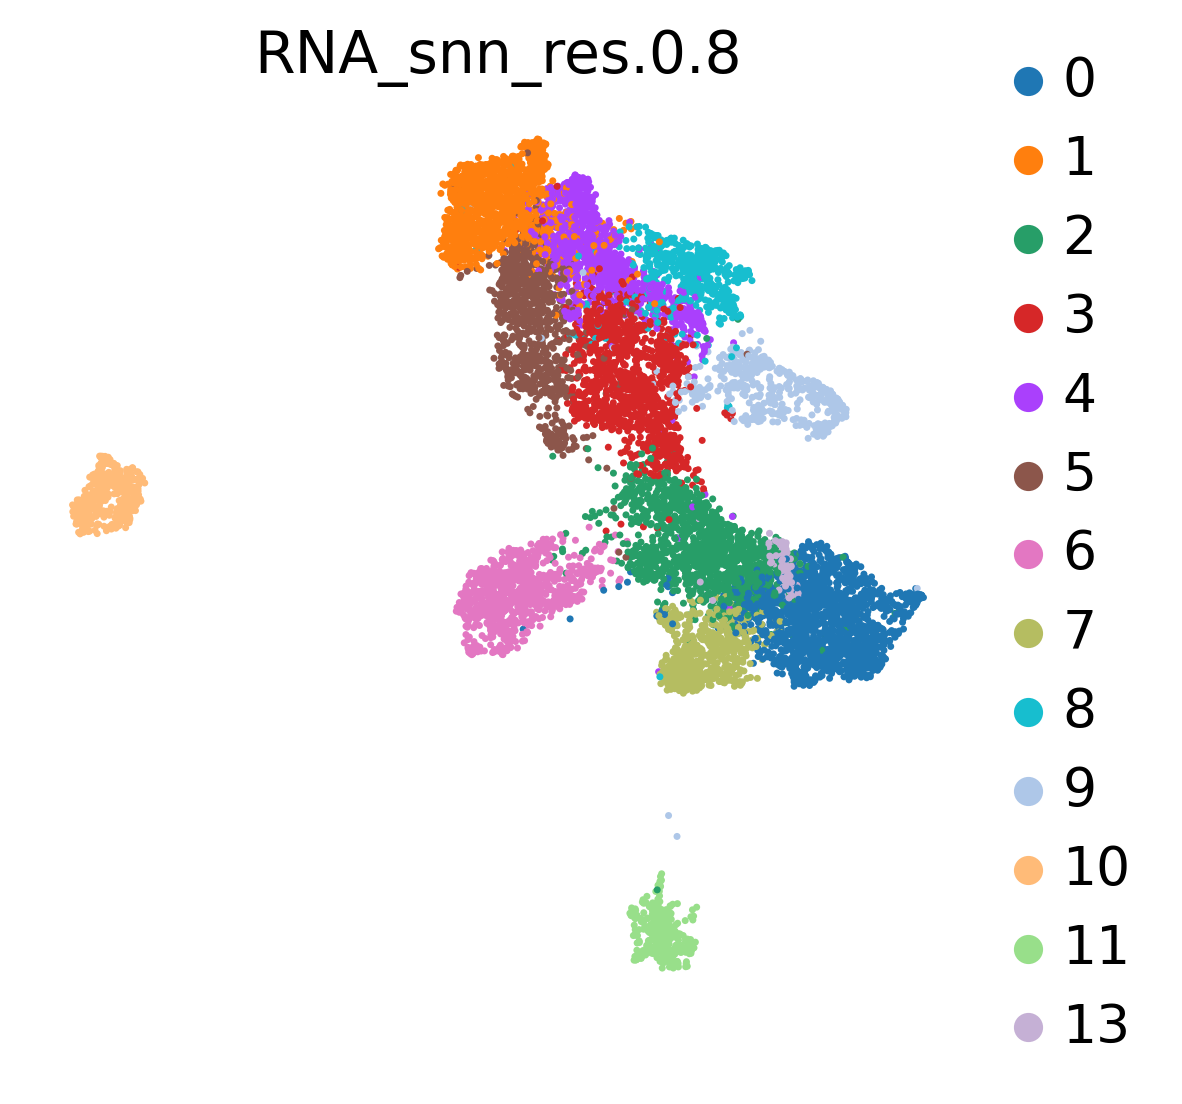

In [5]:
sc.pl.umap(
    adata,
    color=['RNA_snn_res.0.8'],
    frameon=False
)

In [46]:
sc.tl.louvain(adata, resolution=0.8, key_added='sc_louvain')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'sc_louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [32]:
adata.uns['log1p']['base'] = None # solve the key error
sc.tl.rank_genes_groups(adata, 'sc_leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


In [33]:
pd.set_option('display.max_columns', None)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Mertk,Lyz2,C1qb,Fn1,Vcam1,H2-Ab1,Fabp5,Stmn1,Ms4a4c,Cd5l,Siglech,Cst3,Ace,Il1b
1,Vcam1,Plac8,C1qa,Hp,Slc40a1,H2-Eb1,Cd63,Tuba1b,Fcgr2b,Apoc1,Rpl31,Naaa,Itgal,Csf3r
2,Itgad,Ly6c2,Apoe,F13a1,Pld3,H2-Aa,Fth1,Tubb5,Cd74,Sdc3,Tcf4,Ifi205,Cebpb,Srgn
3,Sema6d,Ifitm3,Aif1,Gda,Mrc1,H2-DMa,Ftl1,Tk1,Cd52,Clec1b,Ccr9,Wdfy4,B2m,Mxd1
4,Rgs1,Cebpb,Ms4a7,Vim,Axl,Cd74,Atp6v0d2,Ran,Il1b,Dmpk,Dnajc7,Plbd1,Nr4a1,Nfkbia
5,Frmd4b,S100a4,Ctss,Lyz2,Mertk,Cd209a,Ctsd,Hmgb1,Tmem176b,Il18bp,Irf8,Ppt1,Rap1b,S100a11
6,Abcg1,Ccr2,Pf4,Chil3,Marcks,H2-DMb1,Cd68,Pclaf,H2-Ab1,Lgmn,St8sia4,Tmsb4x,Msn,Trem1
7,Abca1,S100a6,C1qc,S100a6,Lpl,Lsp1,Cstb,Ppia,Ifi27l2a,St3gal5,Bst2,Xcr1,Gngt2,Cxcl2
8,Slc40a1,Chil3,Cxcl16,Tmsb10,Abca1,Cbfa2t3,Gpnmb,Anp32b,H2-Eb1,Fabp7,Cyb561a3,Gng10,Lst1,Ccr1
9,Mrc1,Ifitm2,C3ar1,Ly6c2,Cd81,Gm2a,Ctsz,Rrm1,H2-Aa,Ptgs1,Rnase6,Psmb9,Ptprc,Il1r2


In [65]:
# Annotation
adata.obs['annotation'] = (
    adata.obs["RNA_snn_res.0.8"]
    .map(lambda x: {"0": "RTM-like TAM", "1": "Flor2+ TAM", "2": "Inflam-monocytes", "3": "Trem2+ LAM", "4": "RTM-like TAM", "5": "Trem2+ LAM", "6": "DC1", "7": "Nonclassical monocytes", "8": "RTM-like TAM", "9": "Cycling cells", "10": "DC2", "11": "DC3", "12": "Cycling cells", "13": "Classical monocytes", "14": "Low quality"}.get(x, x))
    .astype("category")
)

In [95]:
# Annotation
adata.obs['annotation2'] = (
    adata.obs["sc_leiden"]
    .map(lambda x: {"0": "Flor2+ TAM", "1": "Classical monocytes", "2": "Trem2+ LAM", "3": "Classical monocytes", "4": "RTM-like TAM", "5": "DC1", "6": "Trem2+ LAM", "7": "Cycling cells", "8": "Inflam-TAM", "9": "RTM-like TAM", "10": "DC2", "11": "DC3", "12": "Nonclassical monocytes", "13": "Classical monocytes"}.get(x, x))
    .astype("category")
)

In [4]:
adata = sc.read_h5ad("adata_filtered.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 10673 × 16413
    obs: 'sample_id', 'nCount_RNA', 'nFeature_RNA', 'mt_ratio', 'ribo_ratio', 'condition', 'RNA_snn_res.1', 'seurat_clusters', 'sc_leiden', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'sc_louvain', 'annotation', 'annotation2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'RNA_snn_res.0.8_colors', 'annotation2_colors', 'annotation_colors', 'leiden', 'log1p', 'louvain', 'neighbors', 'rank_genes_groups', 'sc_leiden_colors', 'sc_louvain_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


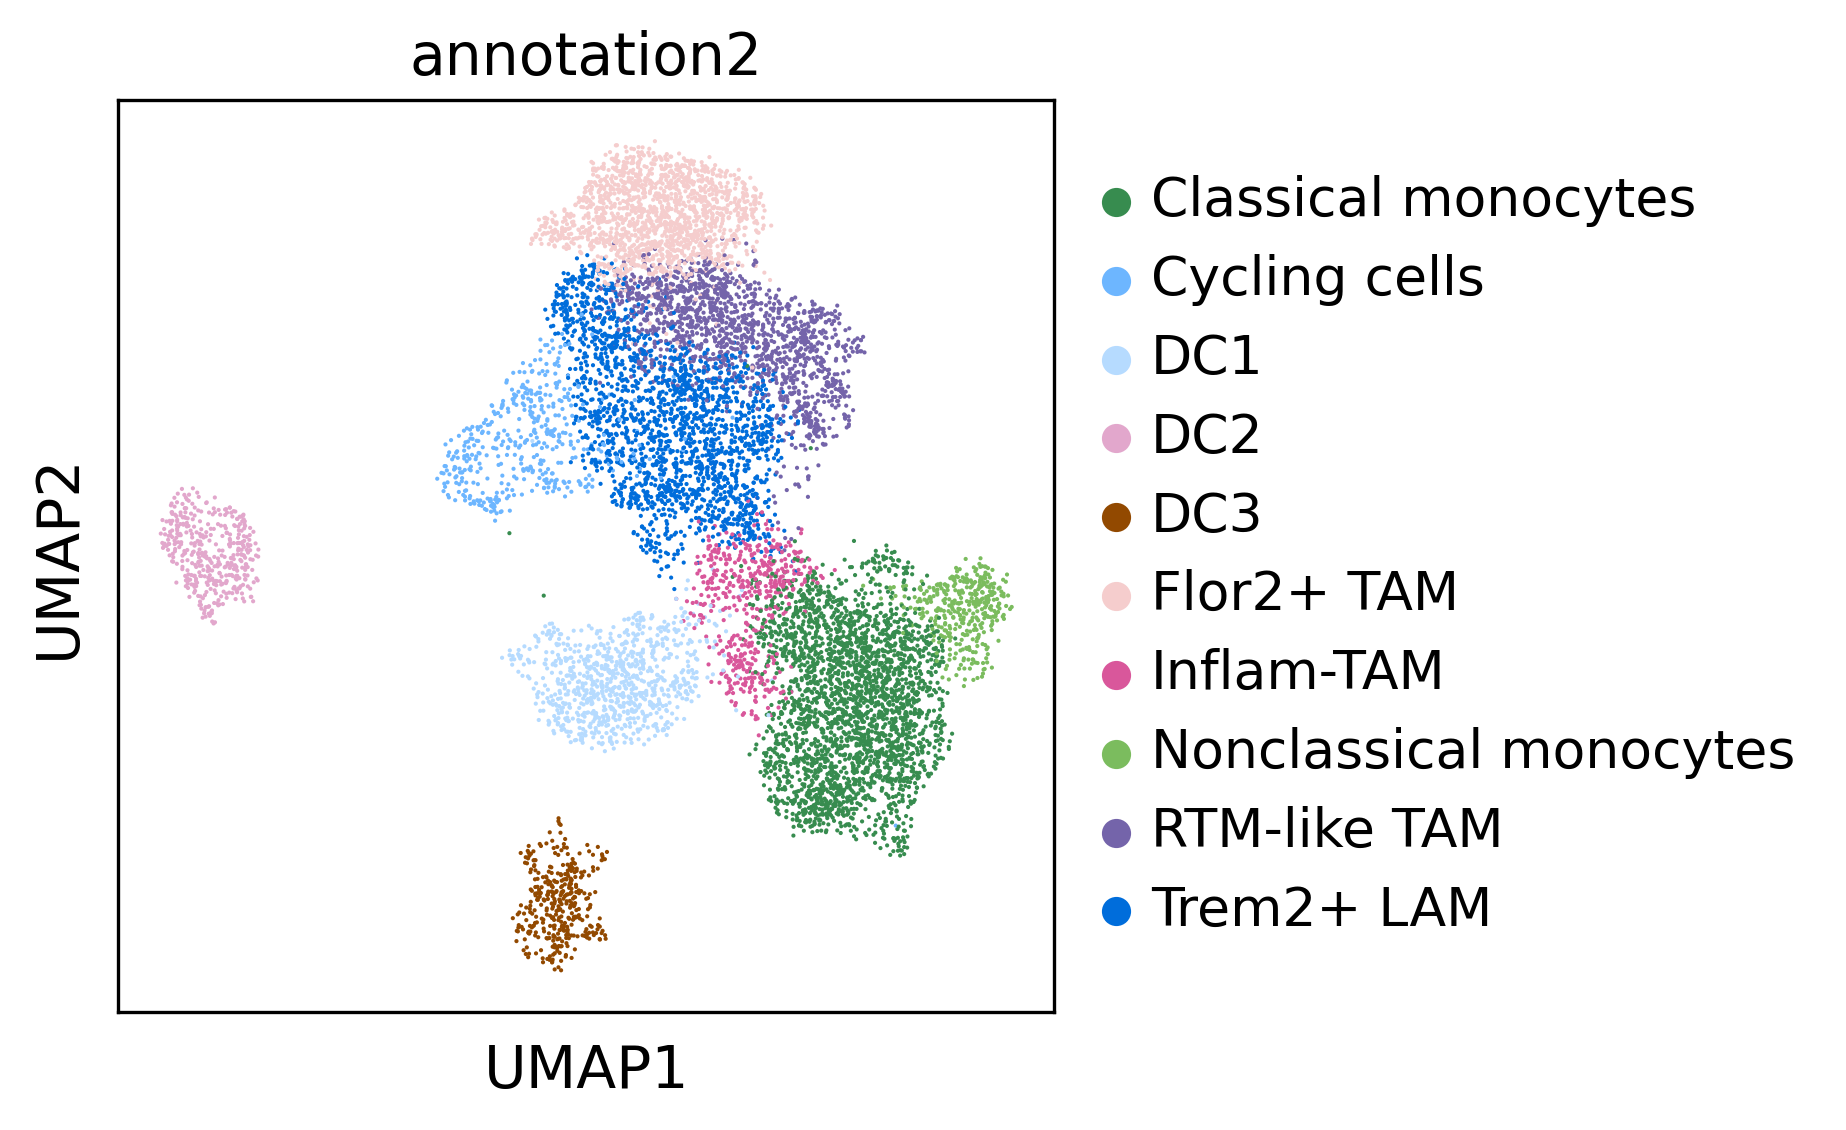

In [9]:
sc.pl.umap(adata, color = 'annotation2', palette=palette_d, s=4, save="mye_landscape.pdf")

In [77]:
adata2 = adata[adata.obs['RNA_snn_res.0.8'] != '12']
adata2 = adata2[adata2.obs['RNA_snn_res.0.8'] != '14']

In [79]:
adata2.write('adata_filtered.h5ad')

In [3]:
adata = sc.read_h5ad('adata_filtered.h5ad')

In [4]:
# Marker visualization
markers = {
    'Classical monocytes': ['F13a1', 'Fn1'], 
    'Cycling cells': ['Mki67', 'Top2a'], 
    'DC1': ['Cd209a', 'Cbfa2t3'], 
    'DC2': ['Tcf4', 'Siglech'], #pDC
    'DC3': ['Clec9a', 'Xcr1'], 
    'Folr2+ TAM': ['Folr2', 'Cd163'], 
    'Inflam-TAM': ['Ccl2', 'Ccl3'], 
    'Nonclassical monocytes': ['Ace', 'Ceacam1'], 
    'RTM-like TAM': ['Itgad', 'Vcam1'], 
    'Trem2+ LAM': ['Trem2', 'Spp1', 'Fabp5']
}

/home/chutianhao/.conda/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


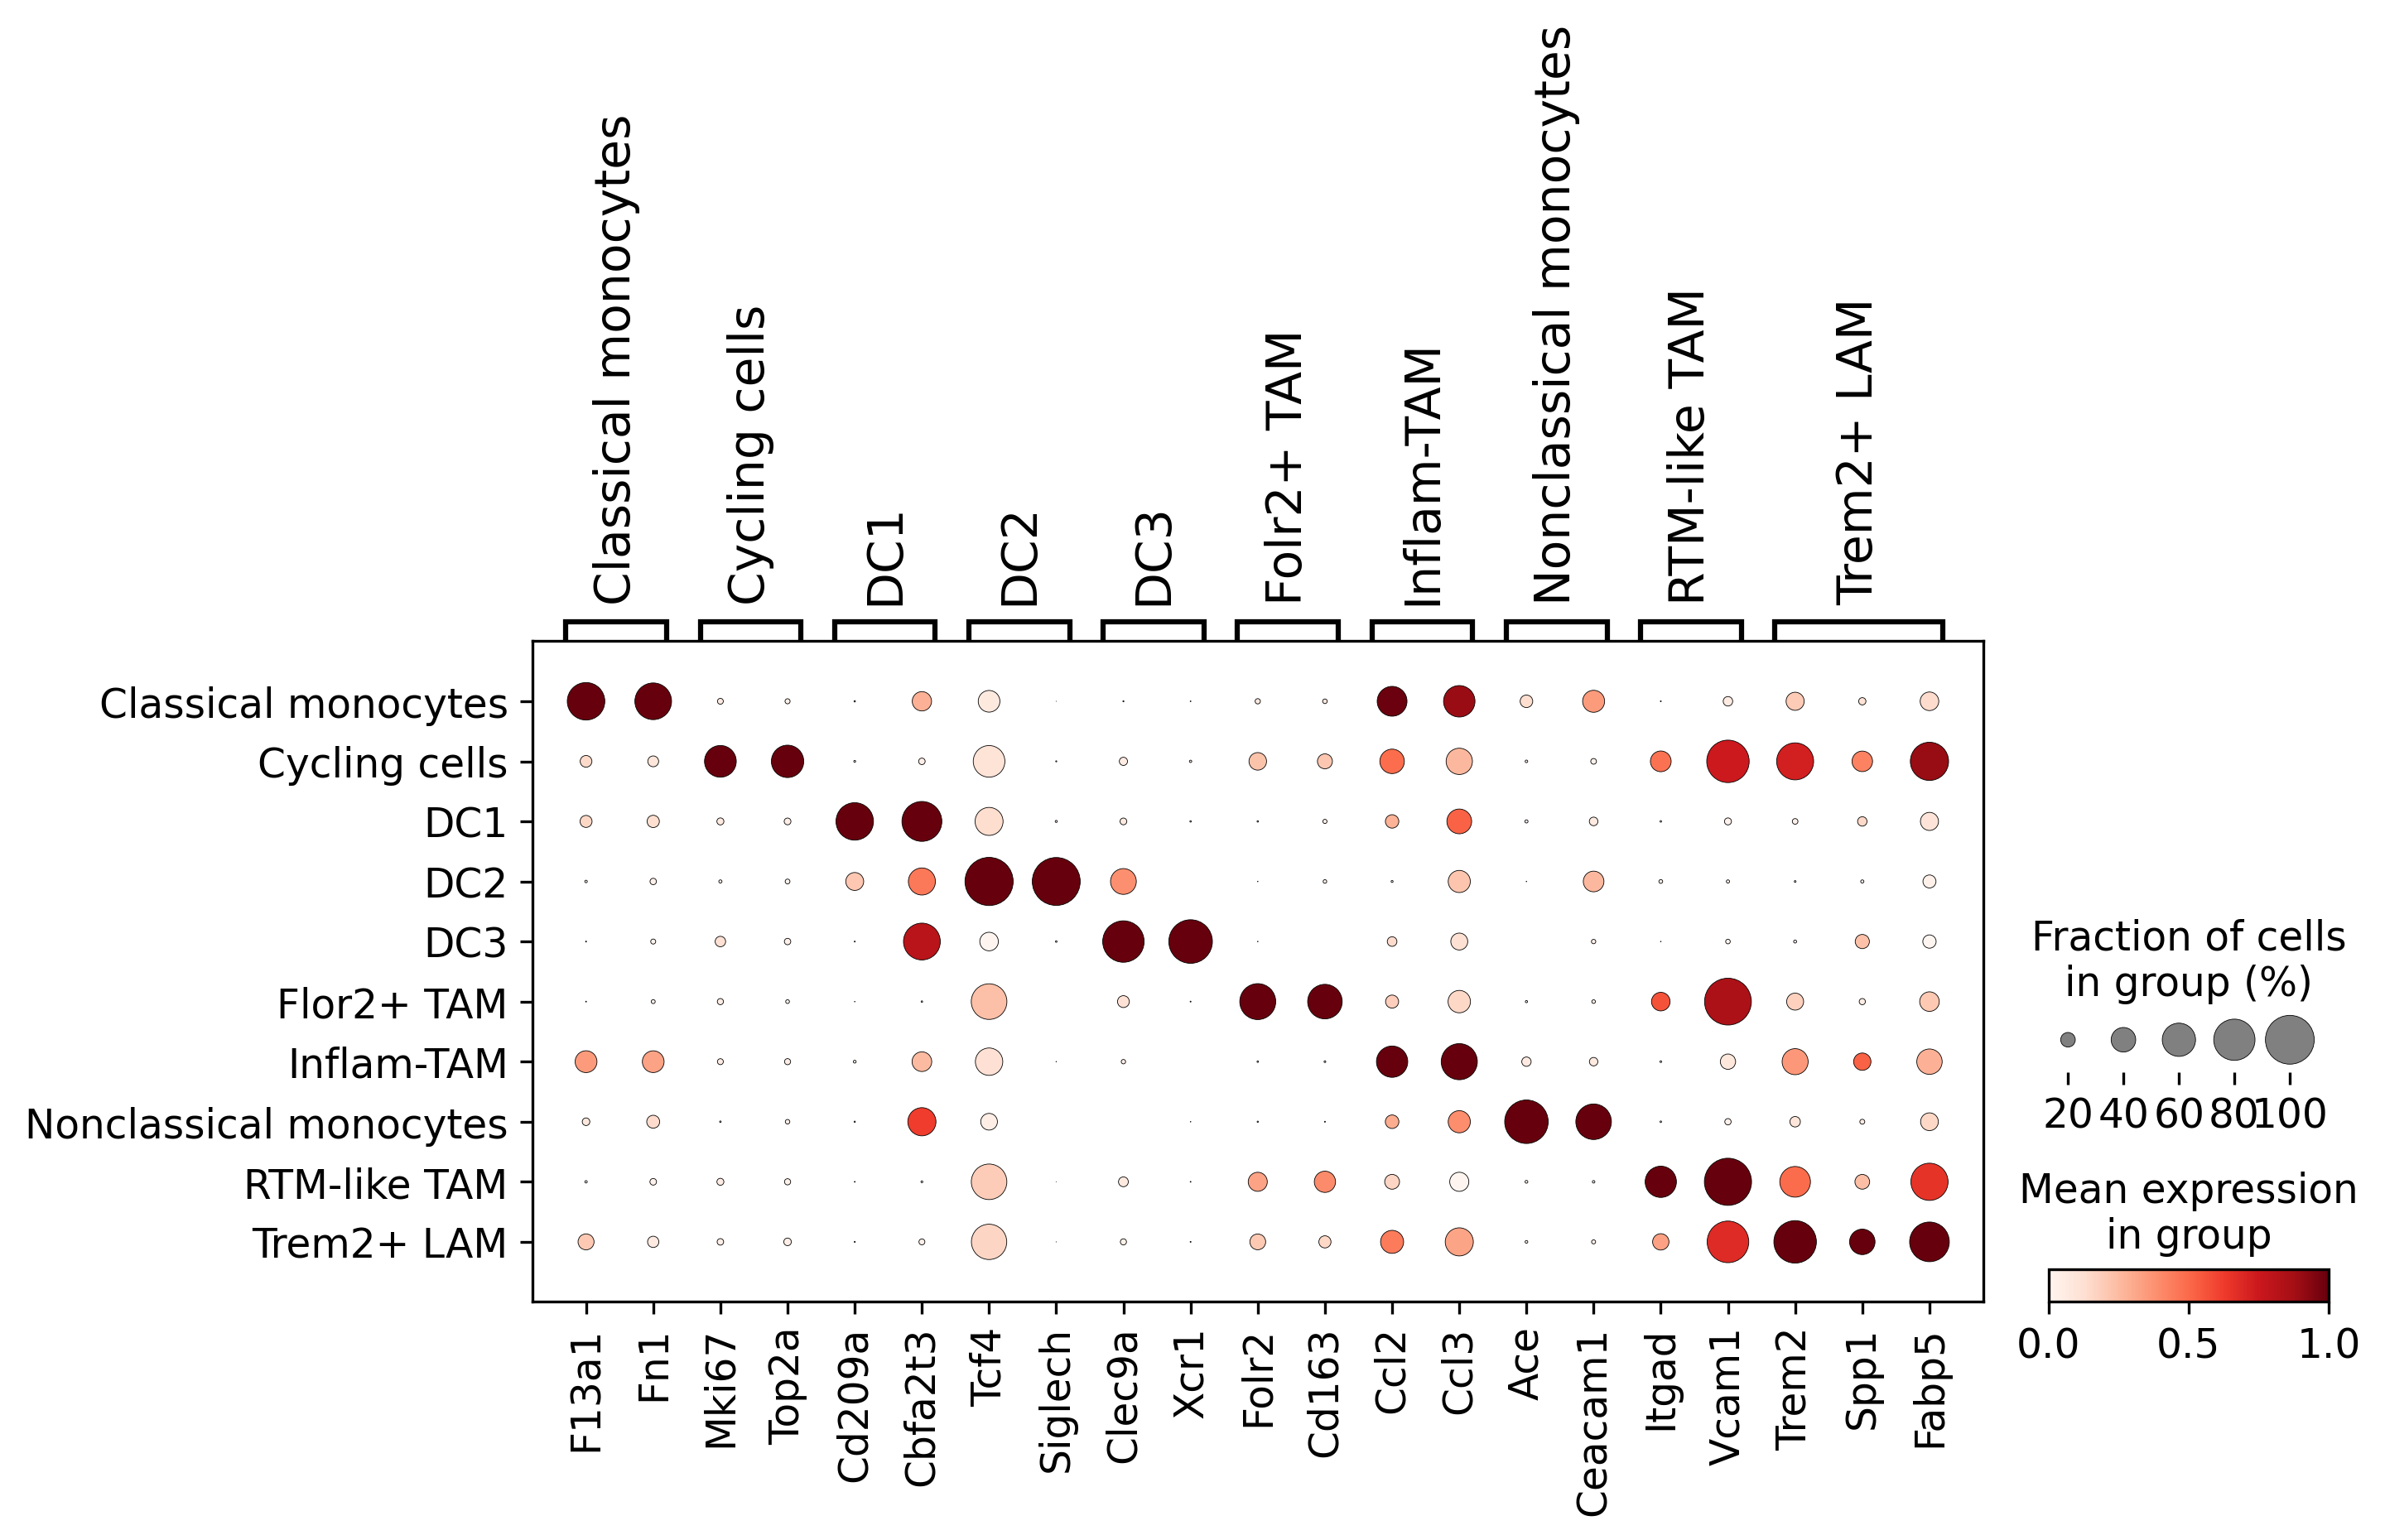

In [5]:
sc.pl.dotplot(adata, markers, groupby='annotation2', standard_scale='var', save="mye_marker_dotplot.pdf")

In [105]:
adata.write('adata_filtered.h5ad')

In [65]:
adata.X = adata.layers['counts'].copy()

In [66]:
# save a raw anndata for conversion to seurat
adata.write('mye_noNT3_raw.h5ad')

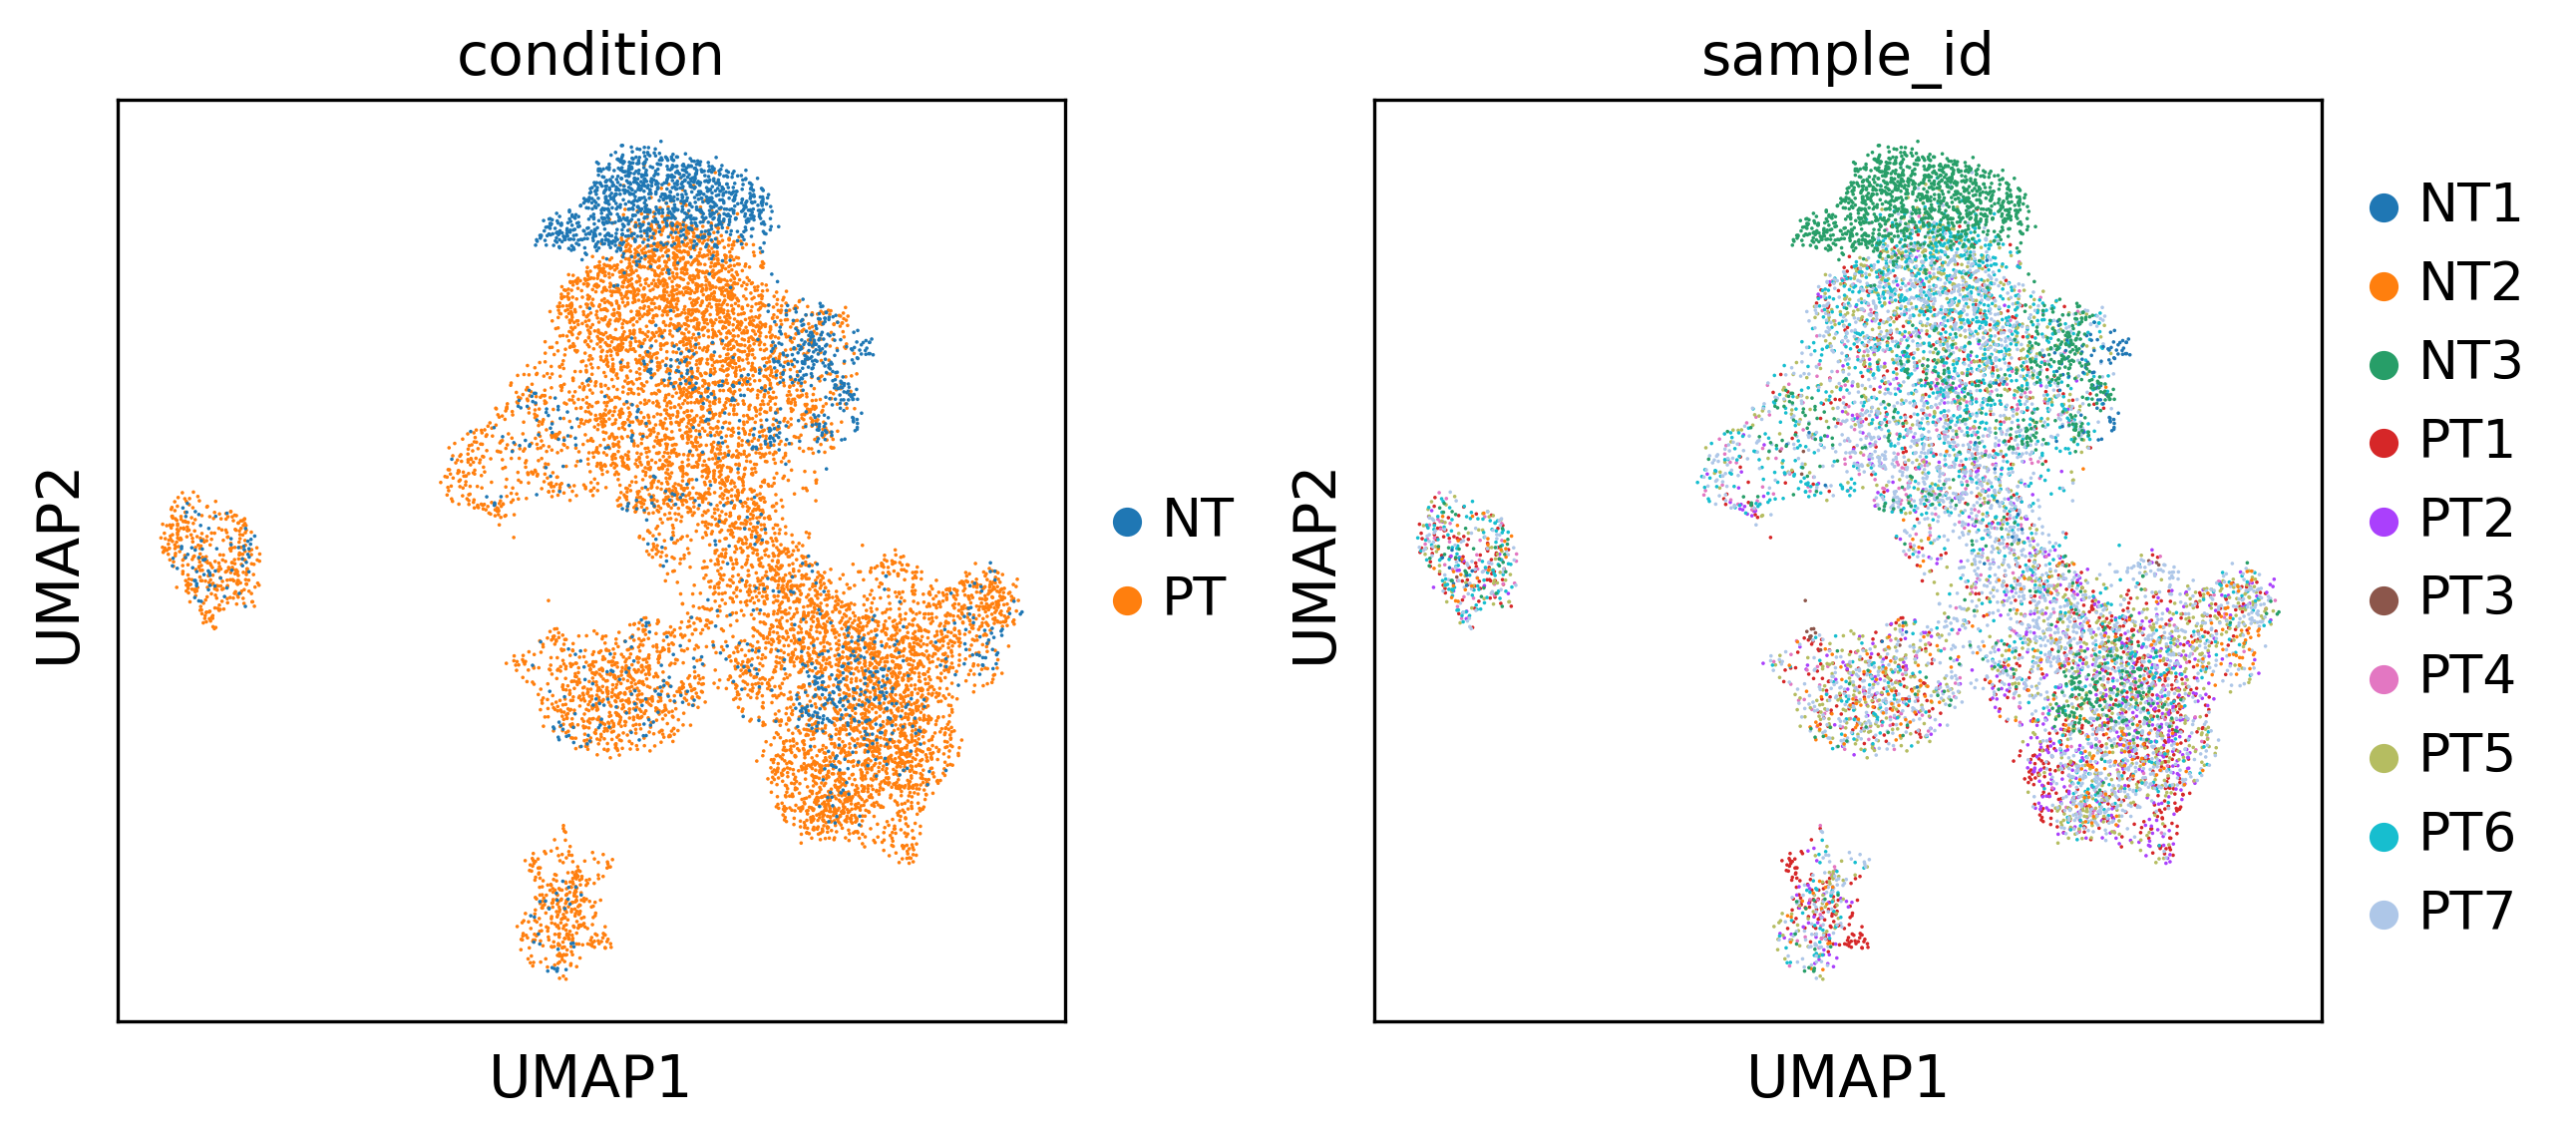

In [15]:
sc.pl.umap(adata, color=["condition", "sample_id"], s=3)

In [19]:
sc.pp.neighbors(adata, use_rep="X_harmony")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [45]:
sc.tl.umap(adata, min_dist=0.5)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [30]:
adata.obs

,sample_id,nCount_RNA,nFeature_RNA,mt_ratio,ribo_ratio,condition,RNA_snn_res.1,seurat_clusters,sc_leiden,RNA_snn_res.0.7,RNA_snn_res.0.8,sc_louvain,annotation,annotation2
PT1_AAACCCAGTAGCTGCC-1,PT1,4441.0,1501,0.872030,5.668193,PT,6,0,1,0,0,1,Classical monocytes,Classical monocytes
PT1_AAACGAAGTTCTCTAT-1,PT1,4979.0,1531,0.698758,6.172360,PT,6,2,1,1,2,1,Inflam-TAM,Classical monocytes
PT1_AAACGAATCATACGGT-1,PT1,1187.0,611,1.341752,5.840568,PT,6,2,1,1,2,1,Inflam-TAM,Classical monocytes
PT1_AAACGCTTCAAGGAGC-1,PT1,5296.0,1581,1.458257,14.181553,PT,13,3,2,4,3,3,Trem2+ LAM,Trem2+ LAM
PT1_AAACGCTTCCACAAGT-1,PT1,5191.0,1638,1.095690,6.318481,PT,6,0,3,0,0,2,Classical monocytes,Classical monocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NT2_TTTCACAAGGTCCAGA-1,NT2,5576.0,2065,6.594539,13.223424,NT,6,0,1,0,0,1,Classical monocytes,Classical monocytes
NT2_TTTCAGTAGCGTCGAA-1,NT2,3884.0,1670,7.275464,17.009533,NT,6,0,1,0,0,1,Classical monocytes,Classical monocytes
NT2_TTTCAGTTCATTGGTG-1,NT2,3546.0,1551,4.023605,16.711373,NT,3,2,8,1,2,6,Inflam-TAM,Inflam-TAM
NT2_TTTCATGTCTGTTGGA-1,NT2,2321.0,1150,6.196841,10.854597,NT,3,7,13,7,7,1,Nonclassical monocytes,Classical monocytes


In [17]:
adata.X = adata.layers["counts"].copy()

In [18]:
adata.write("adata_filtered_raw.h5ad")